<div style="background-color: #bfd630; font-family: Calibri, sans-serif; padding: 20px;">



   <div style="text-align: center;">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 120px; margin-top: 20px; margin-bottom: 60px;">
   </div>

   <div style="text-align: center; font-size: 24px; font-weight: bold; font-family: Calibri; color: #000000; margin-bottom: 10px;">
      Machine Learning Project | To Grant or Not to Grant
   </div>
   
   <div style="text-align: center; font-family: Calibri; font-size: 22px; color: #000000; font-weight: bold; margin-bottom: 20px;">
      3. Feature Selection and Modeling
   </div>

   <div style="text-align: center; font-size: 18px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 5px;">
      Nova Information Management School
   </div>

   <div style="text-align: center; font-size: 18px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 20px;">
      Universidade Nova de Lisboa
   </div>
        <div style="text-align: center; font-size: 16px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 10px;">
      Master in Data Science and Advanced Analytics
   </div>
 
   <div style="text-align: center;">
      <img src="https://cdn.prod.website-files.com/617accb8b04ef2b3feffa61b/6581e90d485a9976c3576a46_how-does-workers-comp-work.jpg" style="width: 350px; margin-top: 20px; margin-bottom: 60px;">
   </div>




   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; font-weight: bold; margin-bottom: 20px;">
      Project Group: 32
   </div>

   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 40px">
      Filipa Pereira -  20240509 <br>
      Klimentina Gilevska -  20240747 <br>
      Maria Assunção -  20211605 <br>
      Rita Matos -  20211642 <br>
      Rita Wang -  20240551 <br>
      Sven Goerdes -  20240503
   </div>

   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 10px">
      Fall/Spring Semester 2024-2025
   </div>

  <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 20px;">
      11th November 2024
   </div>

   
</div>

__Important Information__
> * We decided to split our work into three seperate Notebooks:
>    * __1_Exploratory_Analysis.ipynb__
>    * __2_Data_Preprocessing_Feature_Engineering.ipynb__
>    * __3_Feature_Selection_and_Modeling.ipynb__
> * Use __[this Link](https://liveeduisegiunl-my.sharepoint.com/:f:/g/personal/20240503_novaims_unl_pt/EnKkRQ-J50xFjACxTL76qTkB5EShz59_RLYlbq-Y-O6XkA?e=Ag9TLX)__ to obtain the __required data for this Notebook__ without running 2.

<a id = "toc"></a>
## Table of Contents

* [5.5. Encode Target](#encode-target)
* [5.6 Data Scaling](#data-scaling)
    * [5.6.1. Normalization](#normalization)
    * [5.6.2. Standardization](#standardization)
* [6. Feature Selection](#feature-selection)
    * [6.1. Univariate Variables](#univariate-variables)
    * [6.2. Spearman Correlation](#spearman-correlation)
    * [6.3. Chi-Square for Categorical Data](#chi-square)
    * [6.4. RFE (with Logistic Regression)](#rfe)
    * [6.5. Ridge Regression](#ridge-regression)
    * [6.6. Final Feature Selection](#final-feature-selection)
* [7. Model Building](#model-building)
    * [7.1. Model Training](#model-training)
    * [7.2. Cross-Validation](#model-validation)
    * [7.3. Model Evaluation](#model-evaluation)
* [8. Prediction on Test Set](#prediction-on-test-set)


__Import libaries__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scaling
from sklearn.preprocessing import MinMaxScaler

 #Correlation Heatmap
from matplotlib.colors import LinearSegmentedColormap

#Statistical Test
from scipy import stats
from sklearn.impute import SimpleImputer

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

__Read in Data__

In [3]:
# You can download the data in the source that is linked above the table of contents

# Read in the data
X_val_encoded = pd.read_csv('../project_data/X_val_encoded.csv', delimiter=',', index_col=0)
X_train_encoded = pd.read_csv('../project_data/X_train_encoded.csv', delimiter=',', index_col=0)

y_train = pd.read_csv('../project_data/y_train.csv',delimiter=',', index_col=0)
y_val= pd.read_csv('../project_data/y_val.csv', delimiter=',', index_col=0)

X_test_encoded = pd.read_csv('../project_data/X_test_encoded.csv',index_col=0)

In [4]:
X_test_encoded.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,COVID-19 Indicator,First Hearing Date,Gender,IME-4 Count,Number of Dependents,CarrierGroup_Self-insured Private Entity,CarrierGroup_Self-insured Public Entity,CarrierGroup_Special Funds,CarrierGroup_State Insurance Fund,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,Injury_Cause_Caught_In,Injury_Cause_Cut_Puncture_Scrape,Injury_Cause_Fall_Slip_or_Trip,Injury_Cause_Miscellaneous_Causes,Injury_Cause_Motor_Vehicle,Injury_Cause_Strain_or_Injury,Injury_Cause_Striking_Against_or_Stepping_On,Injury_Cause_Struck_or_Injured_By,Injury_Cause_Unknown,Injury_Cause_Category_encoded_5. PPD SCH LOSS,Injury_Cause_Category_encoded_2. NON-COMP,Injury_Cause_Category_encoded_3. MED ONLY,Injury_Cause_Category_encoded_4. TEMPORARY,Injury_Cause_Category_encoded_1. CANCELLED,Injury_Cause_Category_encoded_8. DEATH,Injury_Cause_Category_encoded_6. PPD NSL,Injury_Cause_Category_encoded_7. PTD,Nature_Injury_Occupational,Nature_Injury_Specific,Nature_Injury_Unknown,Injury_Nature_Category_encoded_5. PPD SCH LOSS,Injury_Nature_Category_encoded_2. NON-COMP,Injury_Nature_Category_encoded_3. MED ONLY,Injury_Nature_Category_encoded_4. TEMPORARY,Injury_Nature_Category_encoded_1. CANCELLED,Injury_Nature_Category_encoded_8. DEATH,Injury_Nature_Category_encoded_6. PPD NSL,Injury_Nature_Category_encoded_7. PTD,Body_Part_Lower_Extremities,Body_Part_Multiple_Body Parts,Body_Part_Trunk,Body_Part_Unknown,Body_Part_Upper_Extremities,Part_Body_Category_encoded_5. PPD SCH LOSS,Part_Body_Category_encoded_2. NON-COMP,Part_Body_Category_encoded_3. MED ONLY,Part_Body_Category_encoded_4. TEMPORARY,Part_Body_Category_encoded_1. CANCELLED,Part_Body_Category_encoded_8. DEATH,Part_Body_Category_encoded_6. PPD NSL,Part_Body_Category_encoded_7. PTD,Days_between_Acc_Assembyl
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,19,0.0,0,1237.870454,2003.0,1,0,0,0,1,0.0,1,0,0,0,0,0.088746,0.417872,0.114385,0.338889,0.026562,1.231365e-03,1.222569e-02,8.795462e-05,0,0,1,0,0,0,0,0,0,0.100389,0.435545,0.130762,0.315185,0.007195,0.000522,0.010203,0.000199,0,1,0,0.088729,0.51587,0.123609,0.255145,0.008433,0.000402,0.007686,0.000127,1,0,0,0,0,0.124058,0.468153,0.124392,0.271624,0.007465,0.000025,0.004209,0.000074,9
6166141,19,0.0,0,806.713484,2003.0,1,0,0,0,0,0.0,1,0,0,0,0,0.038427,0.590381,0.110651,0.240231,0.015761,2.437241e-04,4.224551e-03,8.124137e-05,0,0,0,0,0,0,0,1,0,0.063104,0.578177,0.126633,0.219957,0.005347,0.000381,0.006269,0.000132,0,1,0,0.088729,0.51587,0.123609,0.255145,0.008433,0.000402,0.007686,0.000127,0,0,0,0,0,0.034831,0.628547,0.127982,0.189040,0.008713,0.000869,0.009648,0.000369,43
6165907,59,0.0,0,936.814602,1963.0,1,0,0,0,0,0.0,0,0,0,0,0,0.053814,0.483981,0.123786,0.301248,0.028641,8.321775e-04,7.420250e-03,2.773925e-04,0,0,0,0,0,0,1,0,0,0.061004,0.606832,0.121321,0.202608,0.004499,0.000076,0.003508,0.000153,0,1,0,0.088729,0.51587,0.123609,0.255145,0.008433,0.000402,0.007686,0.000127,0,0,1,0,0,0.011146,0.502907,0.125866,0.332720,0.010357,0.001738,0.014930,0.000336,7
6166047,55,0.0,0,1237.870454,1967.0,1,0,0,0,0,0.0,6,0,0,0,0,0.088746,0.417872,0.114385,0.338889,0.026562,1.231365e-03,1.222569e-02,8.795462e-05,0,0,1,0,0,0,0,0,0,0.100389,0.435545,0.130762,0.315185,0.007195,0.000522,0.010203,0.000199,0,1,0,0.088729,0.51587,0.123609,0.255145,0.008433,0.000402,0.007686,0.000127,1,0,0,0,0,0.124058,0.468153,0.124392,0.271624,0.007465,0.000025,0.004209,0.000074,5
6166102,25,0.0,0,1331.061594,1997.0,1,0,0,0,1,0.0,5,0,0,0,0,0.068548,0.512097,0.104839,0.181452,0.133065,9.235429e-14,9.081505e-13,2.095984e-14,0,0,0,0,0,0,0,1,0,0.063104,0.578177,0.126633,0.219957,0.005347,0.000381,0.006269,0.000132,0,1,0,0.088729,0.

<a id='data-scaling'></a>
### 5.5. Encode Target <a class="anchor" id="encode-target"></a>
[Back to ToC](#toc)<br>

> * First, we still need to encode the target variable, for which we decided not to use LabelEncoder in order to preserve the original values associated with each category. Here is the mapping we used:

In [5]:
claim_injury_type_mapping = {
    '4. TEMPORARY': 4,
    '2. NON-COMP': 2,
    '5. PPD SCH LOSS': 5,
    '3. MED ONLY': 3,
    '6. PPD NSL': 6,
    '1. CANCELLED': 1,
    '8. DEATH': 8,
    '7. PTD': 7
}

y_train_encoded = y_train['Claim Injury Type'].map(claim_injury_type_mapping)
y_val_encoded = y_val['Claim Injury Type'].map(claim_injury_type_mapping)

In [6]:
y_train_encoded.head()

Claim Identifier
5506797    5
5481216    2
5520188    5
5748412    3
5653867    4
Name: Claim Injury Type, dtype: int64

> * Now we will separate the variables into categorical and numerical types for scaling and then apply feature selection.
> * We intentionally decided against using variables that contain information about the region. Reason for that is we want to avoid discrimination based on region ([redlining](https://jpia.princeton.edu/news/regulating-ai-opportunities-combat-algorithmic-bias-and-technological-redlining#:~:text=UCLA%20professor%20Safiya%20Noble%20refers,known%20inequalities%2C%20leading%20to%20the))

In [7]:
num_columns = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Days_between_Acc_Assembyl']

cat_columns = ['Alternative Dispute Resolution', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'COVID-19 Indicator', 'Gender','First Hearing Date',
               'CarrierGroup_Self-insured Private Entity', 'CarrierGroup_Self-insured Public Entity', 'CarrierGroup_Special Funds',
               'CarrierGroup_State Insurance Fund', 'Industry Code_encoded_5. PPD SCH LOSS', 'Industry Code_encoded_2. NON-COMP', 
               'Industry Code_encoded_3. MED ONLY', 'Industry Code_encoded_4. TEMPORARY', 'Industry Code_encoded_1. CANCELLED', 
               'Industry Code_encoded_8. DEATH', 'Industry Code_encoded_6. PPD NSL', 'Industry Code_encoded_7. PTD',
               'Injury_Cause_Category_encoded_5. PPD SCH LOSS', 'Injury_Cause_Category_encoded_2. NON-COMP', 
               'Injury_Cause_Category_encoded_3. MED ONLY', 'Injury_Cause_Category_encoded_4. TEMPORARY', 
               'Injury_Cause_Category_encoded_1. CANCELLED', 'Injury_Cause_Category_encoded_8. DEATH','Injury_Cause_Category_encoded_6. PPD NSL',
                'Injury_Cause_Category_encoded_7. PTD', 'Nature_Injury_Occupational', 'Nature_Injury_Specific', 'Nature_Injury_Unknown',
                'Part_Body_Category_encoded_5. PPD SCH LOSS', 'Part_Body_Category_encoded_2. NON-COMP', 'Part_Body_Category_encoded_3. MED ONLY',
                'Part_Body_Category_encoded_4. TEMPORARY', 'Part_Body_Category_encoded_1. CANCELLED', 'Part_Body_Category_encoded_8. DEATH',
                'Part_Body_Category_encoded_6. PPD NSL', 'Part_Body_Category_encoded_7. PTD']


# Create subsets
X_train_num = X_train_encoded[num_columns]
X_train_cat = X_train_encoded[cat_columns]

X_val_num = X_val_encoded[num_columns]
X_val_cat = X_val_encoded[cat_columns]

X_test_num=X_test_encoded[num_columns]
X_test_cat=X_test_encoded[cat_columns]

<a id='data-scaling'></a>
### 5.6 Data Scaling <a class="anchor" id="data-scaling"></a>
[Back to ToC](#toc)<br>

#### 5.6.1. Normalization<a class="anchor" id="normalization"></a>
[Back to ToC](#toc)<br>

> * We decided to use normalization because it does not assume any specific distribution of the data. Instead, it scales all features to fit within a specified range—in our case, [0, 1]. This approach can be particularly effective for data that does not follow a Gaussian distribution or has outliers.

In [8]:
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
print("Parameters fitted:")
for feature, min_val, max_val in zip(X_train_num.columns, scaler.data_min_, scaler.data_max_):
    print(f"Variable: {feature} | Min: {min_val} | Max: {max_val}")

# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train_encoded.index)
X_train_num_scaled.describe().round(2)

Parameters fitted:
Variable: Age at Injury | Min: 12.0 | Max: 88.0
Variable: Average Weekly Wage | Min: 350.42 | Max: 3236.0
Variable: Birth Year | Min: 1931.0 | Max: 2010.0
Variable: IME-4 Count | Min: 0.0 | Max: 39.0
Variable: Number of Dependents | Min: 0.0 | Max: 6.0
Variable: Days_between_Acc_Assembyl | Min: 0.0 | Max: 433.0


,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Days_between_Acc_Assembyl
count,382717.00,382717.00,382717.00,382717.00,382717.00,382717.00
mean,0.40,0.30,0.60,0.02,0.50,0.06
std,0.18,0.15,0.17,0.05,0.33,0.12
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.19,0.46,0.00,0.17,0.01
50%,0.39,0.29,0.59,0.00,0.50,0.02
75%,0.55,0.34,0.75,0.00,0.83,0.05
max,1.00,1.00,1.00,1.00,1.00,1.00


In [9]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val_encoded.index)
X_val_num_scaled.describe().round(2)

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Days_between_Acc_Assembyl
count,167565.00,167565.00,167565.00,167565.00,167565.00,167565.00
mean,0.40,0.29,0.60,0.02,0.50,0.06
std,0.18,0.15,0.17,0.05,0.33,0.12
min,-0.01,-0.12,0.00,0.00,0.00,0.00
25%,0.25,0.17,0.46,0.00,0.17,0.01
50%,0.39,0.29,0.59,0.00,0.50,0.02
75%,0.55,0.33,0.75,0.00,0.83,0.05
max,1.00,1.00,1.01,0.87,1.00,1.00


In [10]:
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(X_test_encoded.index)
X_test_num_scaled.describe().round(2)

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Days_between_Acc_Assembyl
count,387975.00,387975.00,387975.00,387975.00,387975.00,387975.00
mean,0.39,0.29,0.63,0.00,0.50,0.15
std,0.19,1.19,0.18,0.02,0.33,1.28
min,-0.16,-0.12,-0.41,0.00,0.00,-0.74
25%,0.24,0.21,0.48,0.00,0.17,0.01
50%,0.37,0.29,0.65,0.00,0.50,0.02
75%,0.54,0.31,0.78,0.00,0.83,0.05
max,1.34,675.76,1.18,0.46,1.00,48.09


#### 5.6.2 Standardization<a class="anchor" id="standardization"></a>
[Back to ToC](#toc)<br>


This type of scaling has not been used so far but may be used in the second submission.

In [11]:
# from sklearn.preprocessing import StandardScaler

# std_scaler = StandardScaler().fit(X_train_num)
# X_train_scaled_std= scaler.transform(X_train_num)
# X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns = X_train_num.columns).set_index(X_train_encoded.index)

# X_val_scaled_std = scaler.transform(X_val_num)
# X_val_scaled_std = pd.DataFrame(X_val_scaled_std, columns = X_val_num.columns).set_index(X_val_encoded.index)


## 6. Feature Selection<a class="anchor" id="feature-selection"></a>
[Back to ToC](#toc)<br>

### 6.1. Univariate Variables<a class="anchor" id="univariate-variables"></a>
[Back to ToC](#toc)<br>

> * We began the feature selection process simply by applying the univariate method, checking the variance of numerical variables to ensure that none exhibited zero variance (constant values).

In [12]:
X_train_num_scaled.var()

Age at Injury                0.032134
Average Weekly Wage          0.021773
Birth Year                   0.029914
IME-4 Count                  0.002383
Number of Dependents         0.111358
Days_between_Acc_Assembyl    0.014177
dtype: float64

> As we expected, there are no univariate variables.

### 6.2. Spearman Correlation<a class="anchor" id="spearman-correlation"></a>
[Back to ToC](#toc)<br>

> * We decided to go with Spearman's correlation because it works well when the relationship between variables is monotonic but not necessarily linear. It is also robust to outliers and does not require a normal distribution. Additionally, Spearman is suitable for ordinal data and is less sensitive to extreme values or differences in scale between variables compared to other correlation measures.

In [13]:
def cor_heatmap(cor):
    # Create a mask to hide the upper triangle of the matrix
    mask = np.triu(np.ones_like(cor, dtype=bool))

    annot = cor.copy()
    annot = annot.applymap(lambda x: f"{x:.2f}")  # Formatting the correlation values

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(cor, 
                          mask=mask,              
                          annot=annot,           
                          fmt="",               
                          cmap="coolwarm",  
                          cbar_kws={'shrink': 0.8},
                          vmin=-1, vmax=1, center=0, linewidths=0.5, square=True)

    # Titles
    plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [14]:
cor_spearman= X_train_num_scaled.corr(method ='spearman')
cor_spearman

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Days_between_Acc_Assembyl
Age at Injury,1.000000,0.090391,-0.997573,0.123361,0.000196,0.053961
Average Weekly Wage,0.090391,1.000000,-0.090337,0.019354,-0.002690,0.050098
Birth Year,-0.997573,-0.090337,1.000000,-0.125222,-0.000210,-0.059995
IME-4 Count,0.123361,0.019354,-0.125222,1.000000,0.001672,0.050495
Number of Dependents,0.000196,-0.002690,-0.000210,0.001672,1.000000,0.002900
Days_between_Acc_Assembyl,0.053961,0.050098,-0.059995,0.050495,0.002900,1.000000


C:\Users\ritav\AppData\Local\Temp\ipykernel_6340\2411821414.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.2f}")  # Formatting the correlation values


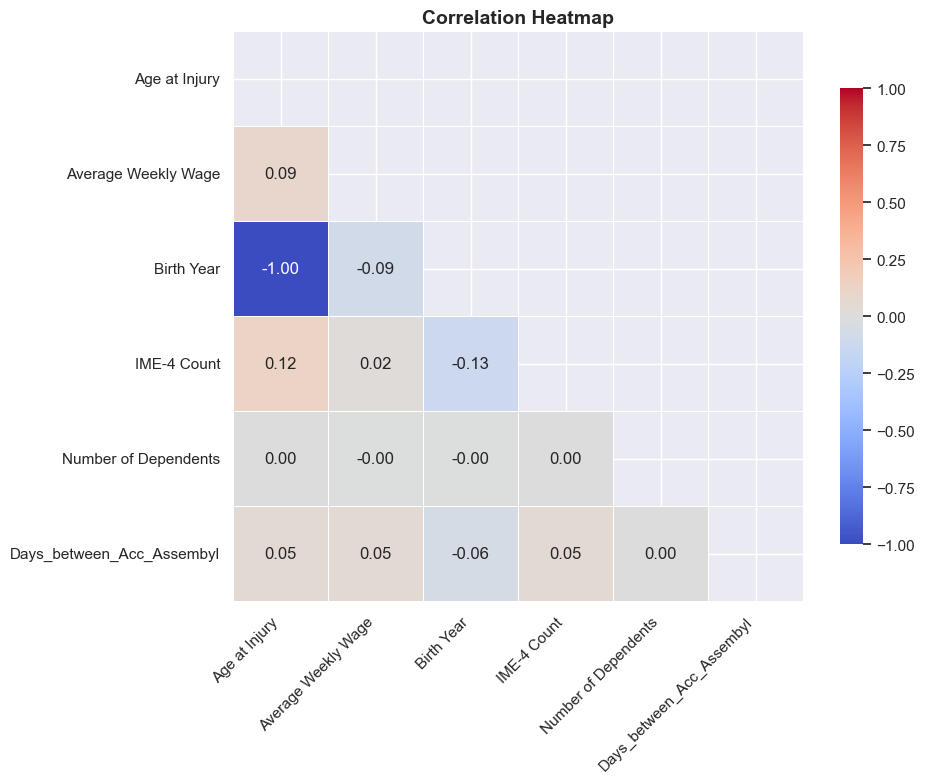

In [15]:
sns.set_theme()
cor_heatmap(cor_spearman)

> Using Pearson correlation, we can conclude that <code>Age at Injury</code> and <code>Birth Year</code> are perfectly negatively correlated. This makes sense, as a higher age at the time of injury corresponds to an earlier birth year, especially since most of the accidents occurred in recent years.    
We need to explore other feature selection techniques to gain further insights and determine which variables should be retained.

### 6.3. Chi-Square for Categorical Data<a class="anchor" id="chi-square"></a>
[Back to ToC](#toc)<br>

> * Concerning categorical variables, we applied the Chi-square test to assess the independence between each feature and the target class, aiming to identify statistically significant relationships. For that we considered significance levels of 5% and features with p-values above this threshold were removed. In these cases, the inability to reject the null hypothesis indicates a lack of statistical evidence supporting the feature's predictive value for the target class.

In [16]:
def TestIndependence(X, y, alpha=0.05):
    chi_scores = []  # List to store p-values
    results = []  # List to store the importance results
    
    for var in X.columns:
        # Create the observed frequency table
        dfObserved = pd.crosstab(y, X[var])
        
        # Perform the Chi-square test
        chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
        
        # Create the expected frequency table
        dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
        
        # Check if the variable is important based on the p-value
        if p < alpha:
            result = f"{var} is IMPORTANT for Prediction"
        else:
            result = f"{var} is NOT an important predictor. (Discard {var} from model)"
        
        # Store the result
        results.append(result)
        
        # Store the p-value
        chi_scores.append(p)
    
    # Series with the p-values
    p_values = pd.Series(chi_scores, index=X.columns)
    for result in results:
        print(result)
    
    return p_values

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
C-2 Date is IMPORTANT for Prediction
C-3 Date is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
First Hearing Date is IMPORTANT for Prediction
CarrierGroup_Self-insured Private Entity is IMPORTANT for Prediction
CarrierGroup_Self-insured Public Entity is IMPORTANT for Prediction
CarrierGroup_Special Funds is IMPORTANT for Prediction
CarrierGroup_State Insurance Fund is IMPORTANT for Prediction
Industry Code_encoded_5. PPD SCH LOSS is IMPORTANT for Prediction
Industry Code_encoded_2. NON-COMP is IMPORTANT for Prediction
Industry Code_encoded_3. MED ONLY is IMPORTANT for Prediction
Industry Code_encoded_4. TEMPORARY is IMPORTANT for Prediction
Industry Code_encoded_1. CANCELLED is IMPORTANT for Prediction
Industry Code_encoded_8. DEATH is IMPORTANT for Prediction
Industry Code_encoded_6. PPD NSL is IMPORTANT for Predict

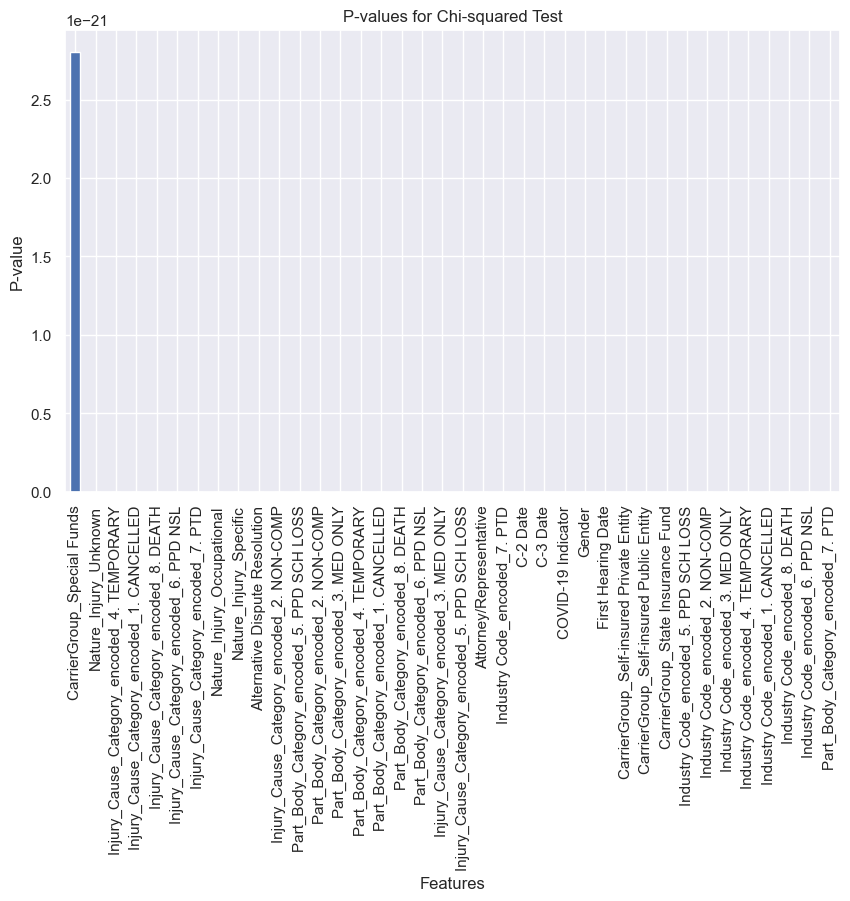

In [17]:
p_values = TestIndependence(X_train_cat, y_train_encoded)

p_values.sort_values(ascending=False, inplace=True) # Sort the p-values in descending order
sns.set_theme()
# Bar chart plot for the p-values
plt.figure(figsize=(10, 6))
p_values.plot.bar()
plt.title('P-values for Chi-squared Test')
plt.xlabel('Features')
plt.ylabel('P-value')
plt.show()

> * According to chi-square, we should keep all the categorical variables.
> * This result is probably not correct and needs go get checked in the next Project-phase

### 6.4. RFE (with Logistic Regression)<a class="anchor" id="rfe"></a>
[Back to ToC](#toc)<br>

In [18]:
# Number of features to test
nof_list=np.arange(1,7)            
high_score=0
#Variable to store the optimum features
nof=0
train_score_list =[] # List to store training scores
val_score_list = [] # List to store validation scores

for n in range(len(nof_list)):
    # DELETE Define your logistic regression model with a different solver
    #model_1 = LogisticRegression(solver='newton-cg', max_iter=1000) 
    model_1 = LogisticRegression(solver='liblinear', max_iter=1000) 
    
    rfe = RFE(estimator = model_1,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train_encoded)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model_1.fit(X_train_rfe,y_train_encoded) # Fit the model on the selected features
    
    #storing results on training data
    train_score = model_1.score(X_train_rfe,y_train_encoded)
    train_score_list.append(train_score)
    
    ####storing results on training data
    val_score = model_1.score(X_val_rfe,y_val_encoded)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 1
Score with 1 features: 0.629445


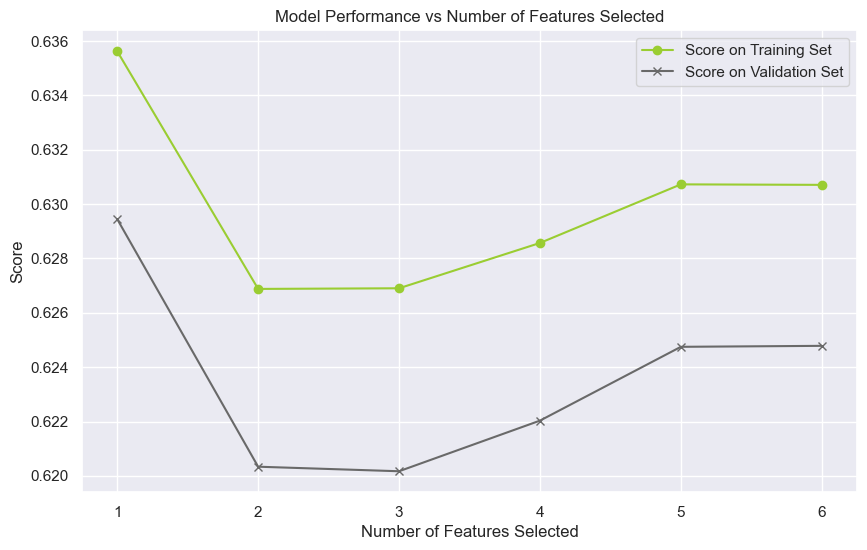

In [19]:
# Plot the training and validation scores for different feature counts
plt.figure(figsize=(10, 6))
plt.plot(nof_list, train_score_list, label="Score on Training Set", color='yellowgreen', marker='o')
plt.plot(nof_list, val_score_list, label="Score on Validation Set", color='dimgray', marker='x')
plt.xlabel("Number of Features Selected")
plt.ylabel("Score")
plt.title("Model Performance vs Number of Features Selected")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Apply the model with the optimal number of features
rfe_optimal = RFE(estimator=model_1, n_features_to_select=nof)
X_train_optimal = rfe_optimal.fit_transform(X_train_num_scaled, y_train_encoded)
X_val_optimal = rfe_optimal.transform(X_val_num_scaled)
model_1.fit(X_train_optimal, y_train_encoded)

# Get the selected features and their ranking
selected_features = pd.Series(rfe_optimal.support_, index=X_train_num_scaled.columns)
print("Selected Features: \n", selected_features)

# Ranking of features
print("Feature Ranking: \n", rfe_optimal.ranking_)

Selected Features: 
 Age at Injury                False
Average Weekly Wage          False
Birth Year                   False
IME-4 Count                   True
Number of Dependents         False
Days_between_Acc_Assembyl    False
dtype: bool
Feature Ranking: 
 [3 5 2 1 6 4]


> According to this method, the only numerical variable to include should be <code>IME-4 Count</code>.

### 6.5. Ridge Regression<a class="anchor" id="ridge-regression"></a>
[Back to ToC](#toc)<br>

> We then applied Ridge Regression (an embedded method) to further assist in the selection of numerical variables. Unlike LASSO, Ridge Regression does not set coefficients to zero, so we have to manually choose which coefficients are most relevant. 

In [21]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values() 
    plt.figure(figsize=(6,8))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

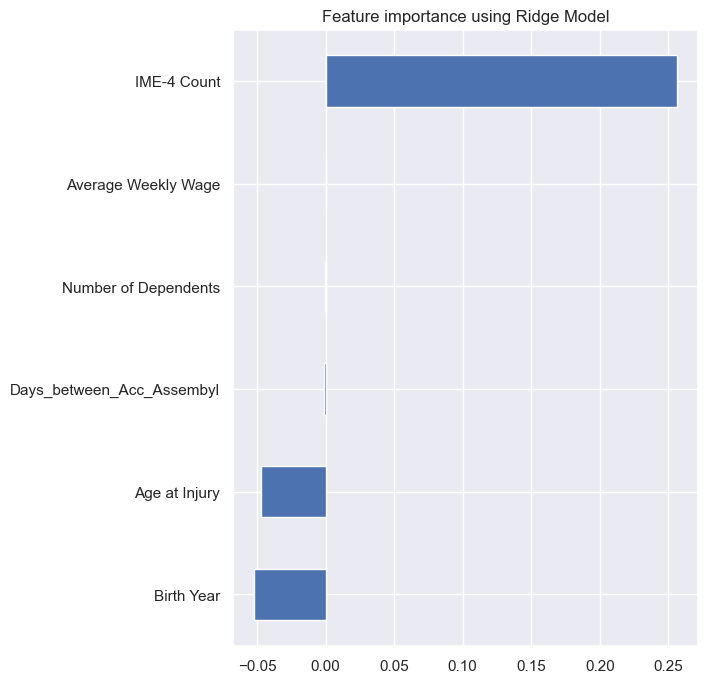

In [22]:
reg = Ridge()
reg.fit(X_train_num, y_train_encoded)
sns.set_theme()
# Extract the coefficients for each class
coef = pd.Series(reg.coef_, index=X_train_num.columns) 
coef.sort_values(inplace=True)  # Sort coefficients for better visualization

# Plot importance of features
plot_importance(coef, 'Ridge')

Based on this approach, the variable with the most significant coefficient is <code>IME-4 Count</code>.

### 6.6. Final Feature Selection<a class="anchor" id="final-feature-selection"></a>
[Back to ToC](#toc)<br>

For the final selection of features, we considered everything we have done so far, and based on that, we created the following tables.
- Regarding the numerical variables, we decided to keep only the variable IME-4 Count.
- For the categorical variables, we applied the Chi-squared test, which identified the relevant ones, so we decided to retain all of them.

### Numerical Data

| Predictor | Spearman | RFE LR | Ridge Regression | What to do? | 
| --- | --- | --- | --- |--- |
| Age at Injury | Keep? | Discard | Discard | Discard |
| Average Weekly Wage | Keep | Discard | Discard | Discard |
| Birth Year | Keep?| Discard | Discard |  Discard |
| IME-4 Count | Keep | Keep | Keep |   Include in the model |
| Number of Dependents | Keep | Discard | Discard | Discard |  
| Days_between_Acc_Assembyl | Keep | Discard | Discard | Discard |  

<br>

<hr>

### Categorical Data

| Predictor | Chi-Square |Predictor | Chi-Square |
| --- | --- | ---| --- | 
|Alternative Dispute Resolution | Keep | Injury_Cause_Category_encoded_1. CANCELLED| Keep |
|Attorney/Representative | Keep |Injury_Cause_Category_encoded_8. DEATH| Keep |
|C-2 Date | Keep |Injury_Cause_Category_encoded_6. PPD NSL| Keep |
|C-3 Date | Keep |Injury_Cause_Category_encoded_7. PTD| Keep |
|COVID-19 Indicator | Keep | CarrierGroup_Self-insured Private Entity | Keep |
|First Hearing Date| Keep | CarrierGroup_State Insurance Fund | Keep |
|Gender | Keep | CarrierGroup_Self-insured Public Entity | Keep |
|Industry Code_encoded_4. TEMPORARY | Keep |CarrierGroup_Special Funds  | Keep |
|Industry Code_encoded_2. NON-COMP | Keep | Nature_Injury_Occupational | Keep |
|Industry Code_encoded_5. PPD SCH LOSS | Keep | Nature_Injury_Specific | Keep |  
|Industry Code_encoded_3. MED ONLY | Keep | Nature_Injury_Unknown | Keep |
|Industry Code_encoded_6. PPD NSL | Keep | Part_Body_Category_encoded_5. PPD SCH LOSS | Keep |
|Industry Code_encoded_1. CANCELLED | Keep |Part_Body_Category_encoded_2. NON-COMP | Keep |
|Industry Code_encoded_8. DEATH | Keep |Part_Body_Category_encoded_3. MED ONLY | Keep |
|Industry Code_encoded_7. PTD | Keep |Part_Body_Category_encoded_4. TEMPORARY | Keep |
|Injury_Cause_Category_encoded_5. PPD SCH LOSS| Keep |Part_Body_Category_encoded_1. CANCELLED| Keep |
|Injury_Cause_Category_encoded_2. NON-COMP | Keep |Part_Body_Category_encoded_8. DEATH | Keep |
|Injury_Cause_Category_encoded_3. MED ONLY| Keep |Part_Body_Category_encoded_6. PPD NSL| Keep |
|Injury_Cause_Category_encoded_4. TEMPORARY| Keep |Part_Body_Category_encoded_7. PTD| Keep |


<hr>

In [23]:
# Remerge the numerical and categorical features
X_train = pd.concat([X_train_num[['IME-4 Count']], X_train_cat], axis=1)
X_val = pd.concat([X_val_num[['IME-4 Count']], X_val_cat], axis=1)
X_test =pd.concat([X_test_num[['IME-4 Count']], X_test_cat], axis=1)

## 7. Model Building<a class="anchor" id="model-building"></a>
[Back to ToC](#toc)<br>

This is a classification problem, since the goal is to predict the categorical variable "Claim Injury Type," which has discrete classes.

In order to assess our model's performance we calculated various metrics:

- **Accuracy**: Based on the percentage of correct predictions, calculates an overall measure of the model's performance. In cases of class imbalance, accuracy alone can be misleading.  

- **Precision**: Measures the proportion of true positive predictions out of all positive predictions, allowing for a focused evaluation of the model's ability to avoid false positives. This metric is particularly relevant when false positives have a higher cost. 

- **Recall**: A percentage of actual positives identified correctly was used to assess the model's sensitivity. This metric ensures that true instances are not overlooked, making it useful in scenarios where false negatives are costly. 

- **F1 Score**: As the most relevant metric, it provides both precision and recall as a single score. In the context of potential class imbalances, this approach addresses false positives and false negatives, offering a more reliable insight into model performance.

### 7.1. Model Training<a class="anchor" id="model-training"></a>
[Back to ToC](#toc)<br>

> * MLPs work well with multiclass classification tasks as they can capture non-linear relationships between features and the target variable. 
> * MLP is our current best model therefore we will continue with this model for now
> * This flexibility makes them suitable for handling the complex structure often found in multiclass datasets.

### 7.2. Model Cross-Validation<a class="anchor" id="model-validation"></a>
[Back to ToC](#toc)<br>

### 7.3. Model Evaluation<a class="anchor" id="model-evaluation"></a>
[Back to ToC](#toc)<br>

## 8. Prediction on Test Set<a class="anchor" id="prediction-on-test-set"></a>
[Back to ToC](#toc)<br>

In [24]:
'''''
# Define the parameter grid for the Decision Tree Classifier
#param_grid_dt = {
#    'criterion': ['gini', 'entropy'],
#    'splitter': ['best', 'random'],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 5]
#}

# Define the parameter grid for the Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}


# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
#Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid_rf,
    cv=5,  # 5-fold cross-validation
    scoring='f1_macro',  # Evaluation metric
    n_jobs=-1  # Use all available cores
)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display the best parameters and the corresponding model
print(f'Best Parameters: {best_params}')
print(f'Best Model: {best_model}')

imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)  # Assume X_test is the data for which you want predictions

# Generate predictions
y_test_pred = best_model.predict(X_test_imputed)

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test_imputed, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
'''''

"''\n# Define the parameter grid for the Decision Tree Classifier\n#param_grid_dt = {\n#    'criterion': ['gini', 'entropy'],\n#    'splitter': ['best', 'random'],\n#    'max_depth': [None, 10, 20, 30],\n#    'min_samples_split': [2, 5, 10],\n#    'min_samples_leaf': [1, 2, 5]\n#}\n\n# Define the parameter grid for the Random Forest Classifier\nparam_grid_rf = {\n    'n_estimators': [50, 100, 200],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False],\n}\n\n\n# Initialize the Decision Tree Classifier\ndt_clf = DecisionTreeClassifier(random_state=42)\n#Initialize the Random Forest Classifier\nrf_clf = RandomForestClassifier(random_state=42)\n\n# Perform Grid Search to find the best parameters\ngrid_search = GridSearchCV(\n    estimator=rf_clf,\n    param_grid=param_grid_rf,\n    cv=5,  # 5-fold cross-validation\n    scoring='f1_macro',  # Evaluation metric\n    n_jobs=-1  # Use all available cores

In [25]:
# Define the best model directly with the optimal parameters
best_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Impute missing values in the test set
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)  # Assume X_test is the test data

# Generate predictions
y_test_pred = best_model.predict(X_test_imputed)

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test_imputed, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')


c:\Users\ritav\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ritav\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ritav\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 1.0


In [ ]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'Claim Identifier': X_test.index,  
    'Claim Injury Prediction': y_test_pred
})

### 8.1. Export Test Results<a class="anchor" id="esxport-test-results"></a>
[Back to ToC](#toc)<br>

In [ ]:
predictions_df

> Save predictions as csv

In [ ]:
predictions_df.to_csv("predictions.csv", index=False)